<a href="https://colab.research.google.com/github/Mart1n2015/MartinCerioli/blob/main/ProyectoDSParteIIICERIOLI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Analisis principales variables financieras de las 500 acciones que componen el indice S&P 500.***

Autor: Cerioli Martin.
:
1. **Introduccion.**

EL S&p 500 es uno de los indices bursatiles más importantes del mundo que se basa en la capitalizacion bursatil de 500 grandes empresas del mercado de Estados Unidos.   
El proyecto se basa en analizar las principales variables financieras de las empresas componentes del S&P500. Para esto se parte de un dataset descargado desde Kaggle que contiene datos de las 500 compañias, el sector economico al cual pertenecen y su informacion de precios, EBITDA, Capitalizacion Bursatil, beneficio por accion, precio por beneficio,  relacion precio ventas y precio valor de libro contable.

2. **Objetivo.**

Analizar las diferentes variables financieras de las empresas comparandolas individualmente vs las relaciones de sus pares sectoriales buscando hallar acciones subvaluadas en funcion a sus indicadores financieros. Para esto  primero se limpian los datos buscando  valores faltantes y reemplazandolos, se eliminan valores outliers, seguida de visualizaciones que permiten responder preguntas clave. Finalmente se utiliza el modelo de regresion lineal para tratar de estimar futuros valores de precios en funcion de los datos financieros de las empresas.  

3. **Hipótesis.**

Hay empresas que por cuestiones de volatilidad de mercado o expectativas suelen quedar subvaluadas o restrasadas respecto al valor "justo" que indica sus fundamentos financieros y sus competidores de la industria en la cual desarrollan sus negocios. Esto implica oportunidades de inversion pensando en que el largo plazo el precio de las acciones siguen sus fundamentos.     

4. **Carga y visualizacion de DATASET**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
url_dataset = "https://raw.githubusercontent.com/Mart1n2015/MartinCerioli/refs/heads/main/financials.csv"

In [3]:
dataframe = pd.read_csv(url_dataset,sep=",")

In [4]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    float64
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(10), object(4)
memory usage: 55.4+ KB


In [5]:
dataframe.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


5.**Busqueda de datos faltantes**

In [6]:
missing = dataframe.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0
Price/Book,8
Price/Earnings,2


In [7]:
dataframe['Price/Book'] = dataframe.groupby('Sector')['Price/Book'].transform(lambda x: x.fillna(x.mean()))
dataframe['Price/Earnings'] = dataframe.groupby('Sector')['Price/Earnings'].transform(lambda x: x.fillna(x.mean()))



Se encontró datos ausentes en las columnas P/B (8) y P/E (2). Se rellenan con los datos correspondientes al promedio de cada sector analizado.  

# 6.*Graficos*

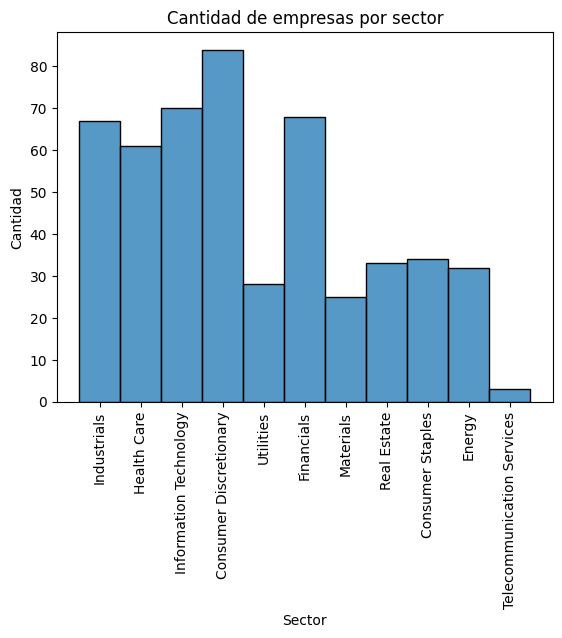

In [8]:
sns.histplot(dataframe['Sector'])
plt.xlabel("Sector")
plt.ylabel("Cantidad")
plt.title('Cantidad de empresas por sector')
plt.xticks(rotation=90)
plt.show()

Se utilizan las bibliotecas  matplotlib y seaborn para realizar graficos de la informacion que tenemos. Como una primera aproximacion podemos ver que cantidad de empresas por sectores componen el indice siendo consumos discrecional,tecnologicas y financieras los principales componentes .  

7. CALCULAMOS EL PROMEDIO DE PER y CAPITALIZACION TOTAL POR SECTOR



In [9]:
dataframe_per = dataframe.groupby('Sector', as_index=False)['Price/Earnings'].mean()
dataframe_MarketCap = dataframe.groupby('Sector', as_index=False)['Market Cap'].mean()

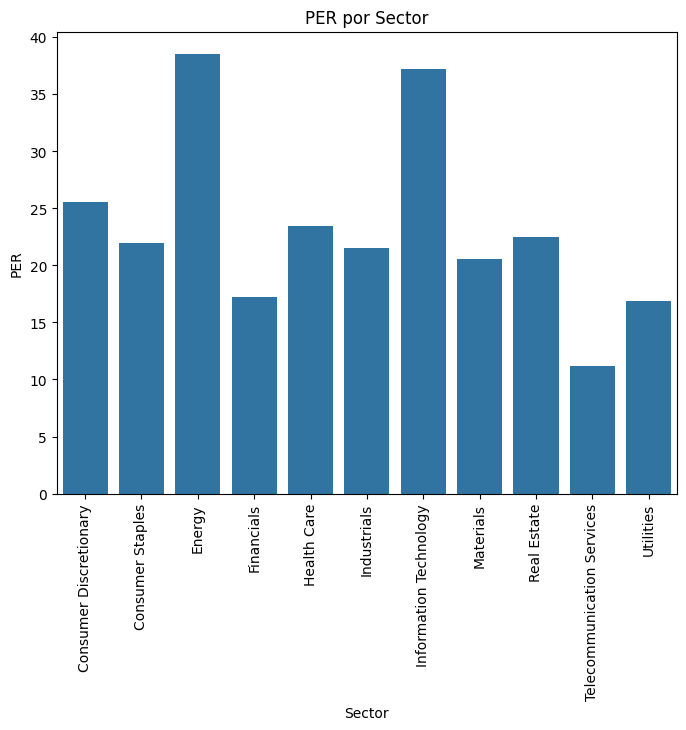

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sector', y='Price/Earnings', data=dataframe_per)
plt.xlabel('Sector')
plt.ylabel('PER')
plt.title('PER por Sector')
plt.xticks(rotation=90)
plt.show()

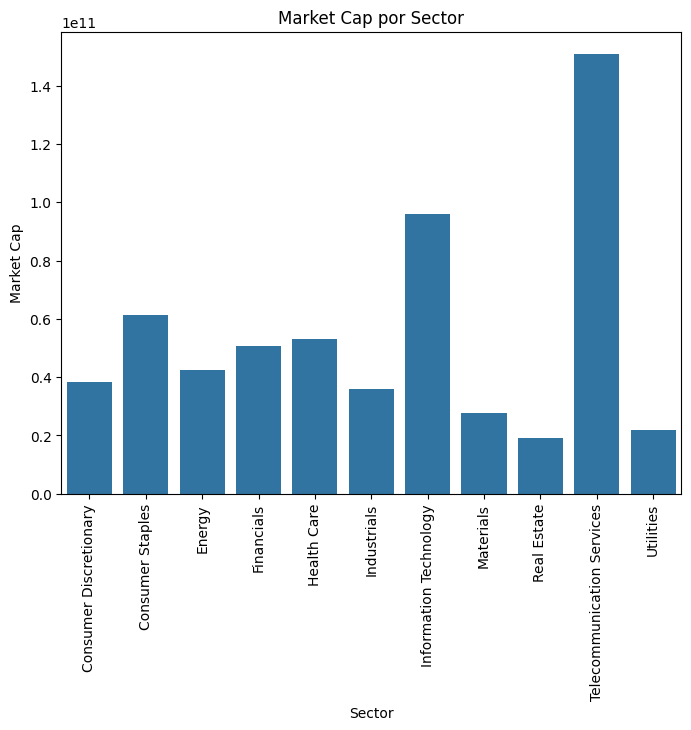

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sector', y='Market Cap', data=dataframe_MarketCap)
plt.xlabel('Sector')
plt.ylabel('Market Cap')
plt.title('Market Cap por Sector')
plt.xticks(rotation=90)
plt.show()

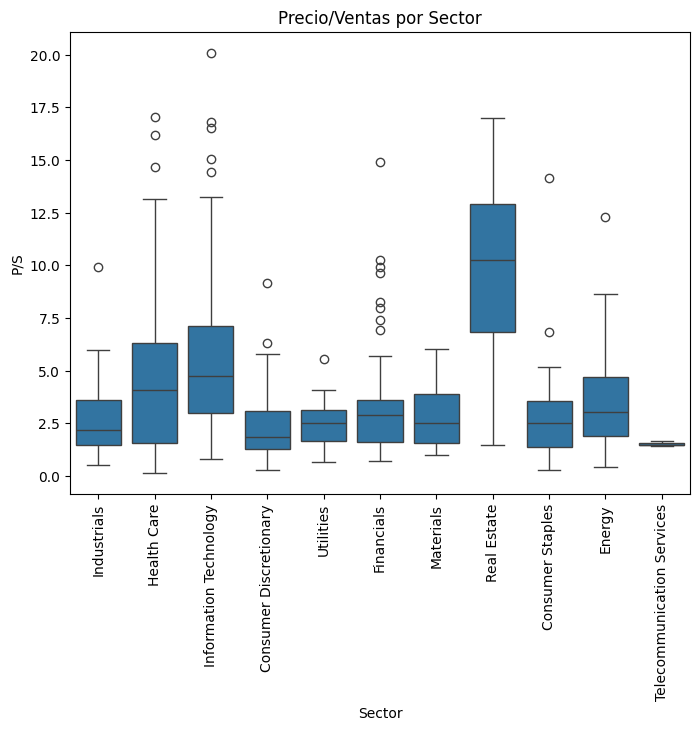

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sector', y='Price/Sales', data=dataframe)
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('P/S')
plt.title('Precio/Ventas por Sector')
plt.show()


8. CONCLUSIONES PRELEMINARES:


1.   Si vemos la distribucion de cantidades de empresas por sector vemos una mayor preponderacion de consumos discrecional, tecnología de la informacion y financieros.
2.   En cuento al indice PER (precio/ganancia) podemos observar que los sectores de tecnologia de la informacion y telecomunicaciones son los que presentan mayores valores, por el otro lado vemos que sectores más tradicionales de la economía como el inmobiliario, materiales y servicios públicos son los que menos veces paga las ganancias de una compañia.
3. Realizando un analisis de outliers en el indice Precios/Ventas utilizando la tecnica de grafico de cajas  podemos ver que en el sector financiero es donde más empresas fueras de rango existen. Tambien podemos observar valores "perdidos" en sectores como medicina, tecnologicas,energía.
4. Como otro punto observable en el grafico de cajas de P/S podemos ver que en general la mayoria de los sectores pagan entre 2 y 3 veces las ventas de la compañia salvo en algunos sectores como son Salud o especialmente inmobiliario donde la relacion precio/ventas es mucho mayor.  





# 9.**Reemplazamos outliers**

Los outliers son valores atipicos que pueden distorcionarnos las conclusiones del analisis. En este caso usamos la tecnica de rango intercaurtilico.    

In [13]:
# Imputar outliers usando IQR

def reemplazar_outliers_iqr(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return col.clip(lower=limite_inferior, upper=limite_superior)

# Aplicar a todas las columnas numéricas

for col in dataframe.select_dtypes(include=np.float64).columns:
    dataframe[col] = reemplazar_outliers_iqr(dataframe[col])

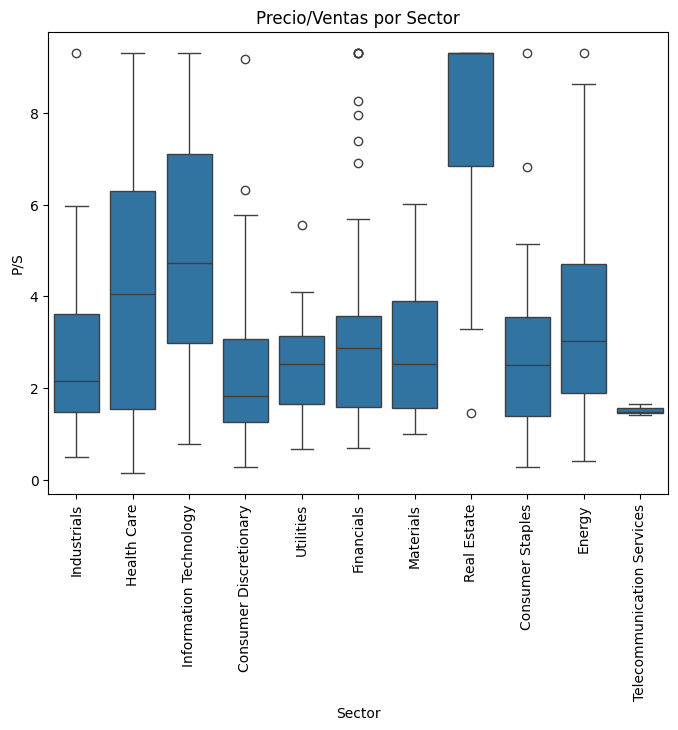

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sector', y='Price/Sales', data=dataframe)
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('P/S')
plt.title('Precio/Ventas por Sector')
plt.show()

10. Buscamos correlaciones entre las variables numericas.

In [15]:
correlacion = dataframe.select_dtypes(include=np.number).corr()

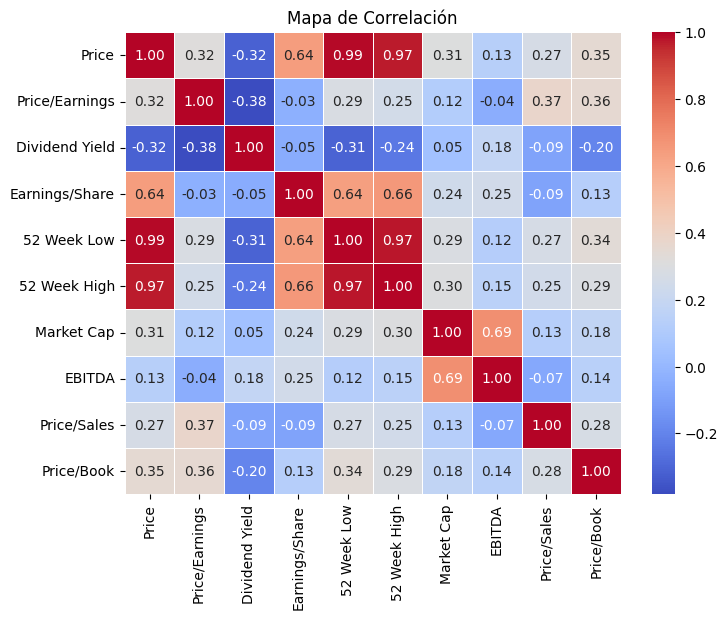

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlación')
plt.show()

En este caso tenemos al precio como variable dependiente y observamos que con todas las otras variables numericas presenta correlacion. Solo en el caso de  "Dividend Yield" la correlacion es negativa y la mayor correlacion se da con el precio más alto y bajo de las últimas 52 semanas. Secando los precios, los cuales es logico la correlacion alta tenemos que el beneficio por accion es un indicador muy apropiado para estimar precios y el indicador "más debil" sería el EBITDA.  

11. Modelo lineal.

Dada la correlacion que encontramos con los datos que poseemos buscaremos crear un modelo lineal que busca estimar un precio a partir de ingresar los datos de las variables independientes.


In [27]:
# Definición de X (features) e y (target)#

x1 = dataframe['Price/Earnings']
x2 = dataframe['Dividend Yield']
x3 = dataframe['52 Week Low']
x4 = dataframe['52 Week High']
x5 = dataframe['Market Cap']
x6 = dataframe['EBITDA']
x7 = dataframe['Price/Sales']
x8 = dataframe['Price/Book']
y  = dataframe['Price']


# Unimos las series en un DataFrame de características
X = pd.concat([x1, x2, x3, x4, x5, x6, x7, x8], axis=1)


In [18]:

# Unimos las series en un DataFrame de características
X = pd.concat([x1, x2, x3, x4, x5, x6, x7, x8], axis=1)

In [19]:
from sklearn.model_selection import train_test_split

# Separación en train y test #
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [28]:
# Creación y entrenamiento del modelo#

modelo = LinearRegression()                    # Instanciamos regresión lineal

modelo.fit(X_train, y_train)                   # Ajustamos a los datos de entrenamiento

# Predicción sobre el conjunto de prueba #
y_pred_test = modelo.predict(X_test)

# Generamos predicciones para test#


Una vez creado el modelo evulamos el mismo a traves de distintas metricas como el error cuadratico medio (MSE), el error absoluto medio y el R². Un bajo MSE indica un mejor ajuste del modelo, un MAE alto indica predicciones mas cercanas y  un R² cercano a uno indica un alto ajuste del modelo a los datos reales.  

In [29]:

# Evaluación del modelo #
mse  = mean_squared_error(y_test, y_pred_test) # Error cuadrático medio
mae  = mean_absolute_error(y_test, y_pred_test)# Error absoluto medio
r2   = r2_score(y_test, y_pred_test)           # Coeficiente de determinación

print("—— Evaluación en Test ——")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² : {r2:.4f}")


—— Evaluación en Test ——
MSE: 46.5808
MAE: 4.5759
R² : 0.9866


Presentamos los datos del modelo:

In [30]:

# Coeficientes e intercepto finales#
print("\n—— Parámetros del Modelo ——")
print(f"Coeficientes (pendientes): {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_:.4f}")


—— Parámetros del Modelo ——
Coeficientes (pendientes): [ 1.95570206e-01 -7.20047624e-01  6.99445020e-01  1.88727672e-01
  5.29676303e-11 -1.39840792e-10 -2.35525754e-01  3.63989955e-01]
Intercepto: -3.3422


En busqueda de mejorar el modelo utilizaremos  la herramienta GridSearchCV

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Define a simple pipeline (replace with your actual pipeline if you have one)
pipeline = Pipeline([('model', LinearRegression())])

# Define a parameter grid (replace with your actual parameter grid if you have one)
param_grid = {}

grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=Pipeline(steps=[('model', LinearRegression())]),
             n_jobs=-1, param_grid={}, scoring='neg_mean_squared_error')

In [23]:
# Evaluar el modelo
y_pred = grid.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Resultados
print("Mejores parámetros:", grid.best_params_)
print("RMSE en test:", rmse)

Mejores parámetros: {}
RMSE en test: 6.825015661512798


In [24]:
mse  = mean_squared_error(y_test, y_pred_test) # Error cuadrático medio
mae  = mean_absolute_error(y_test, y_pred_test)# Error absoluto medio
r2   = r2_score(y_test, y_pred_test)           # Coeficiente de determinación

In [25]:
print("\n—— Parámetros del Modelo ——")
print(f"Coeficientes (pendientes): {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_:.4f}")


—— Parámetros del Modelo ——
Coeficientes (pendientes): [ 1.95570206e-01 -7.20047624e-01  6.99445020e-01  1.88727672e-01
  5.29676303e-11 -1.39840792e-10 -2.35525754e-01  3.63989955e-01]
Intercepto: -3.3422


In [26]:
print(f"R² : {r2:.4f}")

R² : 0.9866


Grafico

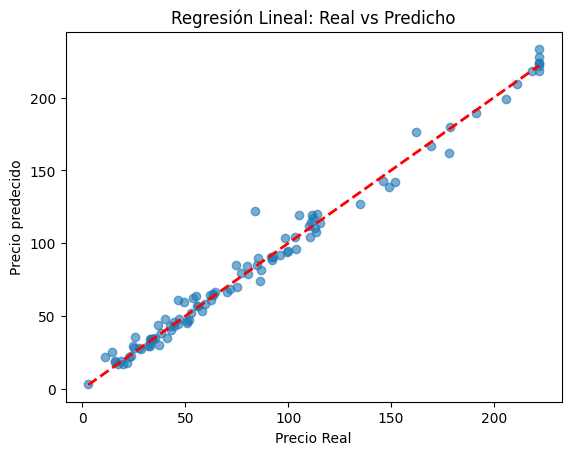

In [37]:
plt.scatter(y_test, y_pred_test, alpha=0.6)     # Gráfico real vs predicho
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)                  # Línea identidad
plt.xlabel("Precio Real")
plt.ylabel("Precio predecido")
plt.title("Regresión Lineal: Real vs Predicho")
plt.show()